### T-Tests
***

In [29]:
# Plots
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np
import pandas as pd

### Normal Distribution
***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac {x - \mu}{\sigma}\big)^2 }$

In [30]:
def normal_pdf(x, mu = 0.0, sigma = 1.0):
    # Answer: A*B
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    B = np.exp(-0.5 * ((x - mu) / sigma)**2)
    return A * B

**Standard Normal Distribution**

$ \mu = 0$ and $ \sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} \big(x - \mu\big)^2 }$

In [31]:
# Middle of the standard normaql pdf

normal_pdf(0.0)

0.3989422804014327

In [32]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line

normal_pdf(0.0, mu = 0.0, sigma = np.sqrt(0.2))

0.8920620580763857

In [33]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line

normal_pdf(0.0, mu = -2.0, sigma = np.sqrt(0.5))

0.010333492677046035

### Plots
***
![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

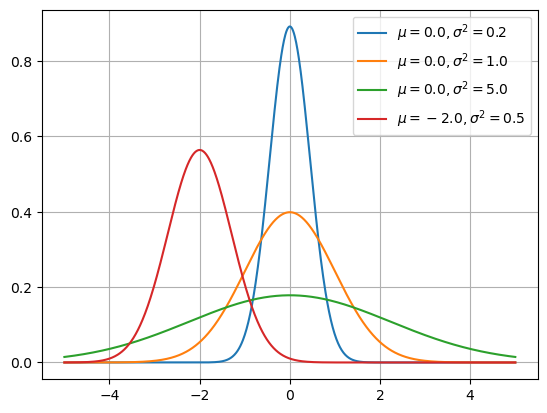

In [34]:
# Create a blank plot
fog, ax = plt.subplots()

# Range of x values
x = np.linspace(-5.0, 5.0, 1001)

# Plot various values for pdf
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
    y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
    ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')
    # ax.plot(x, normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2)))

# Add a legend
ax.legend()

# Add a grid
ax.grid()

# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(0.2)))
# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(1.0)))
# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(5.0)))
# ax.plot(x, normal_pdf(x, mu = -2.0, sigma = np.sqrt(0.5)))

### Area Under the Curve
***

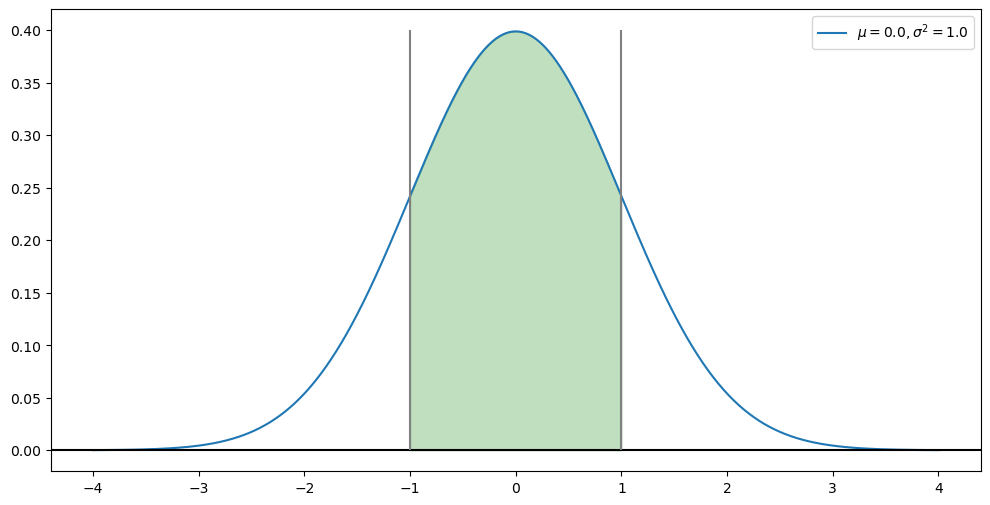

In [35]:
# Create a blank plot
fog, ax = plt.subplots(figsize = (12,6))

# Range of x values
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis
ax.axhline(0.0, color = 'black')

# Add vertical lines
ax.vlines([-1.0, 1.0], 0.0, 0.4, color = 'grey')

# x values between the vertical lines
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines
ax.fill_between(x_interval, normal_pdf(x_interval), color = 'green', alpha = 0.25)
   
# Add a legend
ax.legend();

In [36]:
# The intersection of the grey and blue lines
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'(1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
(1.0, 0.24197072451914337)


### Normal Data
***

In [37]:
# Generate some random normal data
random_data = np.random.standard_normal(100000)
#np.max(np.random.standard_normal(100000))

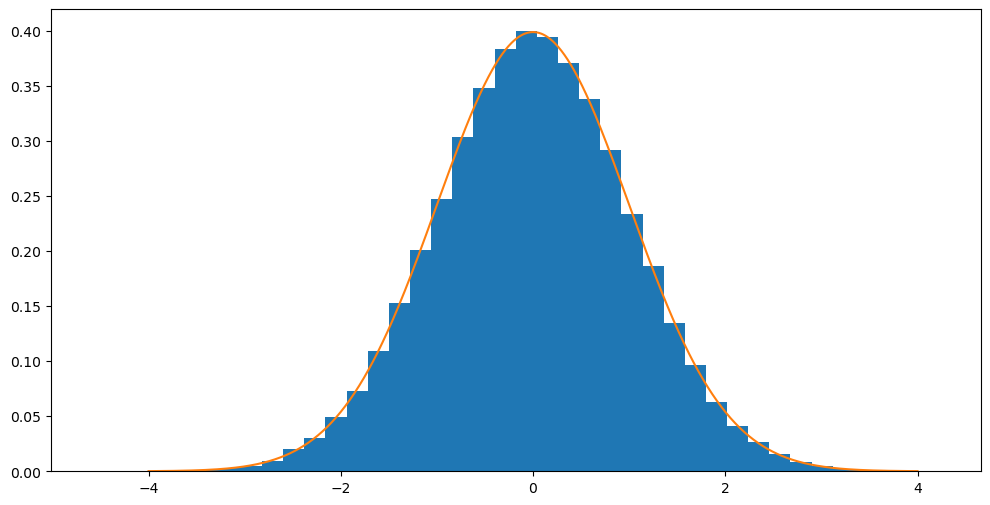

In [38]:
# Create an empty plot
fig, ax = plt.subplots(figsize = (12,6))

# Plot a histogram of the data
ax.hist(random_data, bins = 40, density = True)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');

### Sampling Distribution
***

In [39]:
# Generate some random normal data
random_data = np.random.standard_normal((10000, 25))

# Show
random_data

array([[ 0.17073518, -0.43030611,  0.12894036, ..., -0.72592279,
         0.55053349,  0.21111217],
       [ 0.35538294, -0.69332392, -0.15584729, ..., -2.33015402,
         0.61657463, -0.69218106],
       [-1.29336789,  0.82251744,  0.34620115, ..., -0.06421184,
         0.18294769, -1.14061059],
       ...,
       [-0.46940085, -0.3301645 , -1.26871263, ...,  0.82295639,
        -1.30448381,  1.1460035 ],
       [-0.68061649,  1.65693455,  0.15666504, ..., -0.03544295,
        -0.76163725, -0.67277043],
       [-3.14626655,  1.1380711 , -0.83010427, ..., -1.0732407 ,
        -0.99219808, -1.3428476 ]])

In [40]:
# Mean accros the rows
random_data.mean(axis = 1)

array([-0.18626   , -0.09723956, -0.11681888, ..., -0.37669466,
       -0.00616006, -0.10170582])

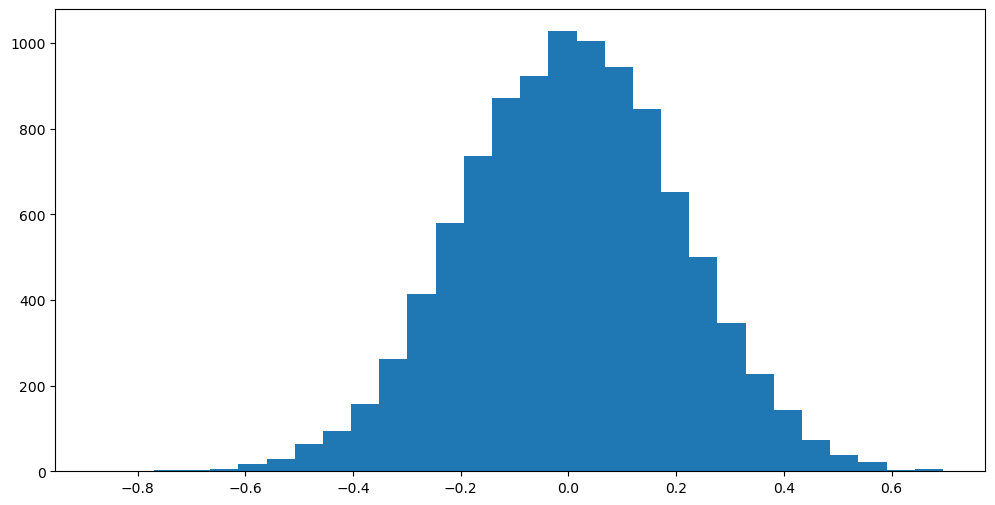

In [41]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30);

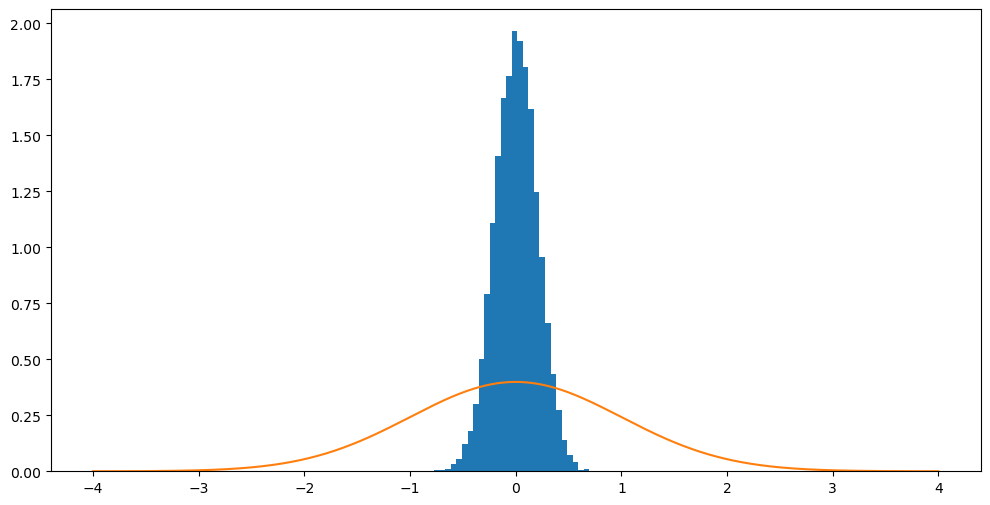

In [42]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

# Plot standard normal distribution
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

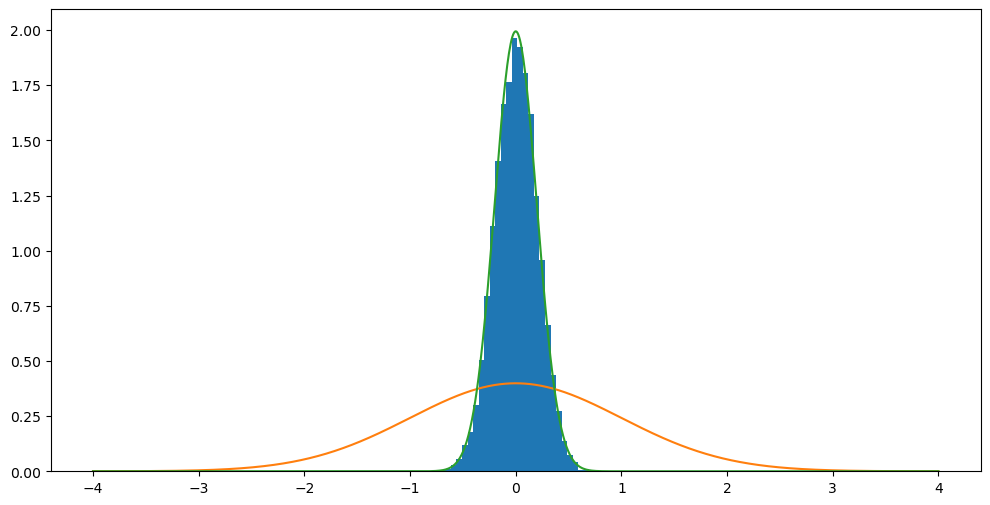

In [43]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

# Plot standard normal distribution
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot standard normal distribution with mu = 0.0 and sigma = 0.2
y = normal_pdf(x, mu = 0.0, sigma = 0.2)
ax.plot(x, y);

### Random Normal
***

In [44]:
# Let-s pick a random mean value
random_mu = np.random.uniform(-3.0, 3.0)

In [45]:
# Generate some random normal data with this unknown mu
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show
random_data

array([[1.6675086 , 1.15216036, 1.21788874, ..., 1.38975677, 0.94351601,
        1.17935311],
       [2.87571164, 3.50464044, 1.89007375, ..., 3.78015681, 2.7601119 ,
        3.52377407],
       [1.08496596, 0.75056996, 2.85095741, ..., 1.78126082, 3.57667136,
        1.1446407 ],
       ...,
       [2.82977354, 3.57224653, 1.67448315, ..., 2.41945819, 1.59711658,
        2.47300422],
       [1.63354821, 2.51473524, 2.03292182, ..., 1.71568995, 2.12467278,
        2.03522494],
       [3.25872614, 2.71048864, 2.28784969, ..., 2.80379543, 2.85157804,
        0.72904108]])

(array([1.77666036e-03, 5.32998109e-03, 8.88330182e-03, 2.30965847e-02,
        5.32998109e-02, 9.41629993e-02, 2.14975904e-01, 3.53555412e-01,
        5.27668128e-01, 8.79446880e-01, 1.12284935e+00, 1.46219148e+00,
        1.82463019e+00, 1.90457991e+00, 2.04138276e+00, 1.79265031e+00,
        1.63985752e+00, 1.29873873e+00, 9.78939860e-01, 6.89344221e-01,
        3.55332073e-01, 2.39849149e-01, 1.31472867e-01, 7.10664145e-02,
        3.02032262e-02, 1.59899433e-02, 1.77666036e-03, 1.77666036e-03,
        0.00000000e+00, 1.77666036e-03]),
 array([1.17545396, 1.23173933, 1.28802471, 1.34431009, 1.40059547,
        1.45688085, 1.51316622, 1.5694516 , 1.62573698, 1.68202236,
        1.73830774, 1.79459311, 1.85087849, 1.90716387, 1.96344925,
        2.01973463, 2.07602   , 2.13230538, 2.18859076, 2.24487614,
        2.30116152, 2.35744689, 2.41373227, 2.47001765, 2.52630303,
        2.58258841, 2.63887378, 2.69515916, 2.75144454, 2.80772992,
        2.86401529]),
 <BarContainer object of

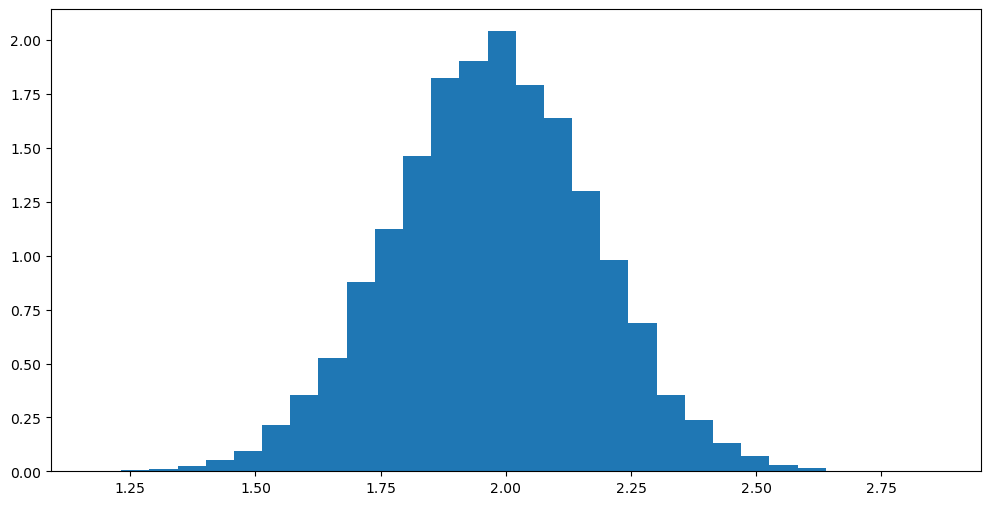

In [46]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

In [47]:
# Estimate random_mu from above histogram
# Now look at the value

random_mu

1.9720385154108309

In [48]:
# A random sample of size 50
sample = np.random.normal(random_mu, 1.0, 50)

# Show
sample

array([2.37961388, 1.35043744, 3.13758006, 1.40237913, 2.5226641 ,
       1.1830976 , 0.98511296, 1.25942166, 3.05306538, 3.52956559,
       2.08679425, 1.04738284, 3.82822567, 1.03733446, 2.19712942,
       1.68220412, 1.58295313, 1.86103085, 1.59411425, 2.66915556,
       0.34815578, 2.35949419, 2.01924324, 2.95200538, 2.99708325,
       0.26329662, 1.44267918, 2.25534008, 0.48203666, 1.77491552,
       2.87274281, 2.74345894, 4.94399501, 1.17520699, 2.94585896,
       2.71270075, 1.83832696, 1.45699476, 1.39628932, 1.05023712,
       2.0493806 , 2.32649872, 1.66350383, 2.523909  , 3.57014744,
       1.74184202, 1.59077912, 1.68984629, 2.58639831, 3.91436268])

In [49]:
# Calculate the mean of the sample
sample.mean()

2.0815198376374697

### Independent Sample t-test
***

In [52]:
# Load Iris
df = pd.read_csv('iris.csv')

# Show
df

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

***

### End